# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
# Загрузка необходимых библиотек

import pandas as pd
import numpy as np 
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
# Зададим случайное состояние для вего проекта

RANDOM_STATE = 12345

In [3]:
# Загрузим данные из файлов

try:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')
    df_1 = pd.read_csv('/datasets/geo_data_1.csv')
    df_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    df_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    df_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

### Исследование данных.

Выведем для каждого региона в цикле информацию о данных:
- общую информацию;
- первые пять строк;
- кол-во пропусков;
- кол-во дубликатов;
- распределение данных;
- взаимозависимость данных.

Регион №  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
Кол-во пропусков:  0
Кол-во явных дупликатов:  0
Кол-во явно дублирующихся скважин:  10
Гистограммы значений для Региона  1


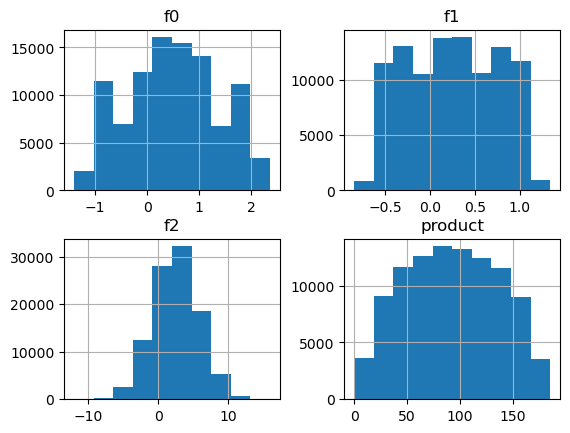

Матрица корреляции для Региона  1


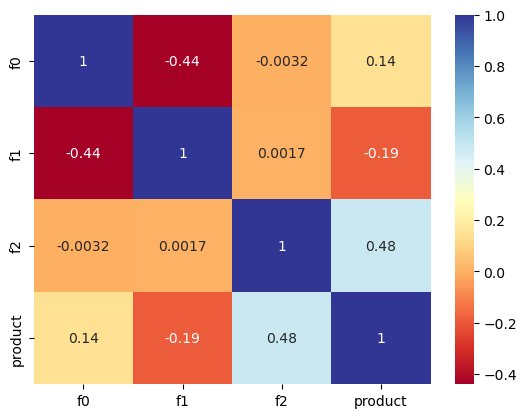

Диаграмма распределения признаков для Региона  1


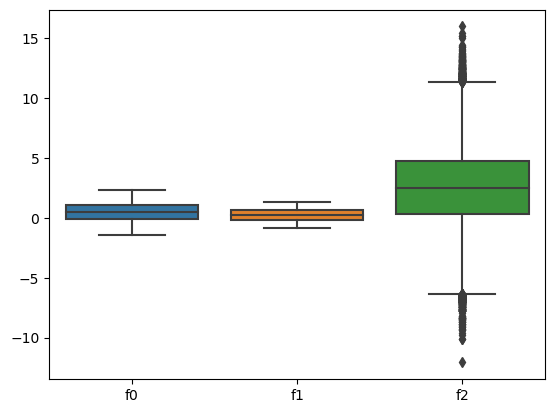

Регион №  2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
Кол-во пропусков:  0
Кол-во явных дупликатов:  0
Кол-во явно дублирующихся скважин:  4
Гистограммы значений для Региона  2


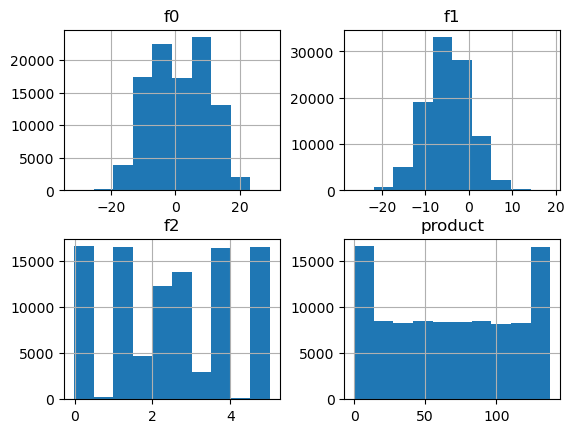

Матрица корреляции для Региона  2


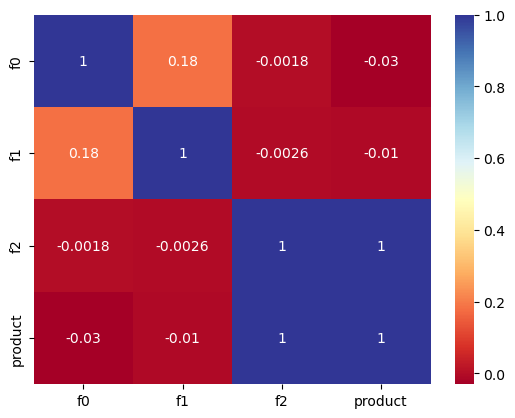

Диаграмма распределения признаков для Региона  2


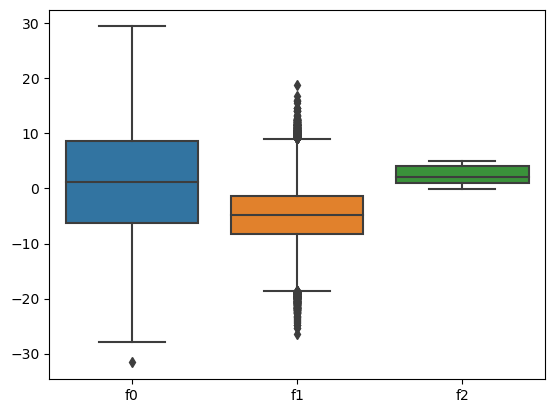

Регион №  3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
Кол-во пропусков:  0
Кол-во явных дупликатов:  0
Кол-во явно дублирующихся скважин:  4
Гистограммы значений для Региона  3


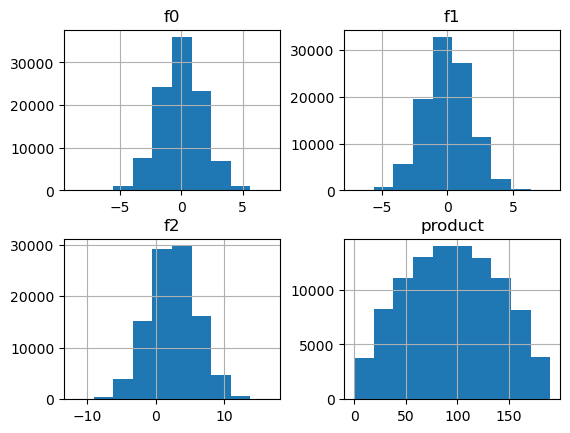

Матрица корреляции для Региона  3


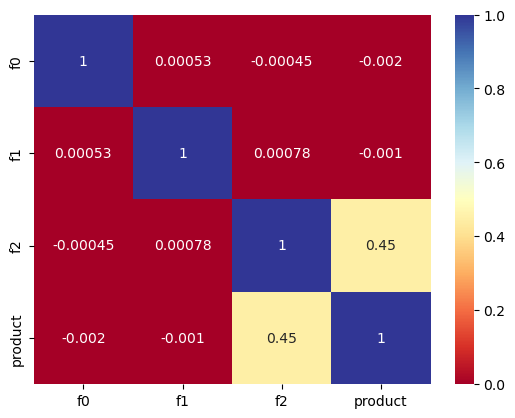

Диаграмма распределения признаков для Региона  3


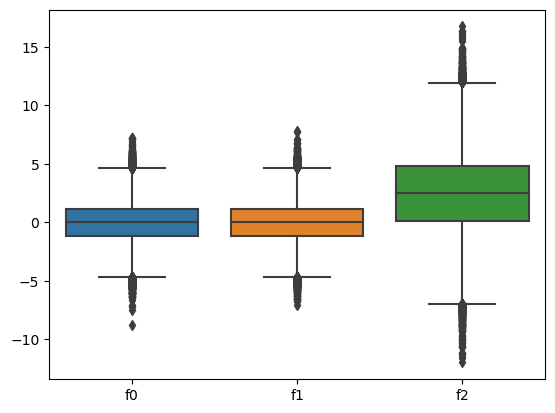

In [4]:
# Выведем для каждого региона информацию о данных(пропуски дубликаты, распределение данных, взаимозависимость данных)

reg_num =1
for df in [df_0, df_1, df_2]:
    print('Регион № ',reg_num)
    print(df.info())
    print(df.head())
    print('Кол-во пропусков: ', df.isna().sum().sum())
    print('Кол-во явных дупликатов: ', df.duplicated().sum())
    print('Кол-во явно дублирующихся скважин: ', df['id'].duplicated().sum())
    
    print('Гистограммы значений для Региона ', reg_num)
    df.hist()
    plt.show()
   
    print('Матрица корреляции для Региона ', reg_num)
   
    sns.heatmap(df.corr(), cmap="RdYlBu", annot=True)
    plt.show()
   
    print('Диаграмма распределения признаков для Региона ', reg_num)
    sns.boxplot(data=df[['f0','f1','f2']])
    plt.show()
    
    reg_num +=1
    

Text(0.5, 1.0, 'Распределение целевогого признака в регионах')

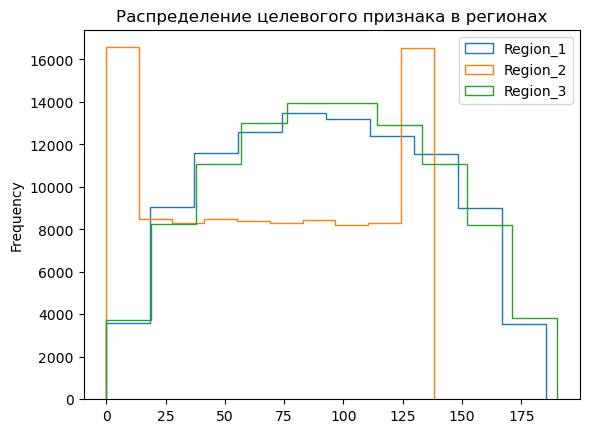

In [5]:
# Выведем гистограммы целевых признаков сразу во всех регионах

ax1 = df_0['product'].plot(kind='hist', histtype='step')
ax2 = df_1['product'].plot(kind='hist', histtype='step')
ax3 = df_2['product'].plot(kind='hist', histtype='step')
plt.legend(['Region_1','Region_2','Region_3'])
plt.title('Распределение целевогого признака в регионах')

*Выводы по разделу:*
- Попусков в данных не обнаружено
- Некоторые скважины включены в данные несколько раз (целесобразно их удалить, так как мы не знаем значения какой из дублирующихся строк соответствует истины, а большой потери данных не произойдет)
- Есть явные различия в распределении целевого признака. В 1-ом и 3-ем регионах распределение значений напоминает нормальное, тогда как во 2-ом регионе равномерное с пиками у мин. и макс. значений.
- Также у 2-ого региона есть явная прямая зависимость целевого признака от признака f_2. Возможно в регионе есть локализованная область с особо богатым пластом, где у всех скважин будет как высокий f2, так и запасы нефти.
- Распределение признаков у регионов отличается: В 1-ом регионе выбросы только у признака f_2, во 2-ом регионе у f_1, в 3-ем регионе у всех признаков присутстуют выбросы.

### Предобработка данных.

Для каждого региона в цикле выполним следующие действия:

- Удалим все строки, имещие дублирующиеся значения в столбце 'id';
- Удалим столбец 'id', это признак не нужен;
- Выведем размеры получившихся дата-сетов.

In [6]:
# В цикле обработаем признаки во всех регионах

reg_num =1
for df in [df_0, df_1, df_2]: 

    print('Регион', reg_num)
    # Удалим все строки, имеющие дубликаты в столбце 'id', выведем размер фрейма после удаления.

    print(df.shape)
    df.drop_duplicates(subset=['id'], keep=False, inplace=True)
    print(df.shape)

    # Удалим столбец категориальных признаков, выведем размер фрейма после удаления.

    df.drop(['id'], axis=1, inplace=True)
    print(df.shape)

    
    reg_num +=1

Регион 1
(100000, 5)
(99980, 5)
(99980, 4)
Регион 2
(100000, 5)
(99992, 5)
(99992, 4)
Регион 3
(100000, 5)
(99992, 5)
(99992, 4)


*Вывод по разделу:*

После предобработки часть данных была потеряна. Потери незначительны.

## Обучение и проверка модели

В цикле для каждого региона выполним следующие действия:
- Сохраним признаки в отдельных переменных;
- Разобъем выборки на обучающую и валидационную;
- Создадии пайп-лайн, который выполнит следующие действия:
 - Масштабирует признаки;
 - Обучит модель линейной регрессии;
- Посчитаем среднее значение метрики RMSE при кросс-валидации модели на 5 выборках из обучающего набора;
- Обучим модель на всей обучающей выборке и посчитаем метрику RMSE для валидационной выборки.

In [7]:
# В цикле построим и проверии модели для всех регионов

reg_num =1
for df in [df_0, df_1, df_2]: 
    
    # Сохраним признаки и целевой признак в отдельных переменных

    features = df.drop(['product'], axis=1)
    target = df['product']
    
    # Разделим данные на 2 выборки: обучающую и тестовую в пропорции 75:25.

    features_train, features_test, target_train, target_test =\
    train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)
    
    # Pipeline для масштабирования признаков и обучения модели

    pipeline = Pipeline(steps=[
        ('scaler',StandardScaler()),
        ('reg', LinearRegression())
    ], verbose=False)

    # Кросс-валидация модели через pipeline
    #neg_median_absolute_error neg_mean_absolute_percentage_error
    
    scores = -cross_val_score(pipeline, features_train, target_train, cv=5, scoring='neg_root_mean_squared_error') 
    crosval_score = scores.mean()
    print(f'Cреднее значение RMSE для региона {reg_num} при кросс-валидации: {crosval_score:0.3f}')
    
    # Загрузим в pipeline данные трнировочных выборок для масштабирования и обучения модели
    
    pipeline.fit(features_train, target_train)
    predictions = pipeline.predict(features_test)
    
    rmse = round(mean_squared_error(target_test, predictions)**0.5, 3)
    print(f'Значение RMSE на тестовой выборке для модели, построенной для региона {reg_num}: {rmse:0.3f}')
          
    reg_num +=1
    

Cреднее значение RMSE для региона 1 при кросс-валидации: 37.689
Значение RMSE на тестовой выборке для модели, построенной для региона 1: 37.717
Cреднее значение RMSE для региона 2 при кросс-валидации: 0.890
Значение RMSE на тестовой выборке для модели, построенной для региона 2: 0.891
Cреднее значение RMSE для региона 3 при кросс-валидации: 40.082
Значение RMSE на тестовой выборке для модели, построенной для региона 3: 39.976


*Выводы по разделу:*
- Самое лучший показатель RMSE у модели, построенной для 2-ого региона. У 1-ого и 3-его региона показатели незначительно отличаются между собой;
- Столь существенные отличия возможно связаны с распределением целевого признаком у регионов (у 1-ого и 3-его региона она напоминают нормальное рапределение, у 2-ого региона равномерное), а также прямой корреляцией одного из признаков с целевым признаком в регионе 2.

## Подготовка к расчёту прибыли

**Основные условия:**

- При разведке региона исследуют 500 скважин, выбирают 200 скважин лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.


In [8]:
# Создадим константы для ключевых значений

INVEST = 10000000000 # Бюджет на регион
DRILL_HOLES_PROD = 200 # кол-во скважин для разработки
DRILL_HOLES_POT = 500 # кол-во потенциальных скважин 
REVENUE_PER_PROD = 450000 # Выручка на тыс. барралей

Рассчитаем средний запас на скважину для окупаемости вложений, исходя из бюджета, кол-ва скважин и выручки с тонны.

In [9]:
# Формула расчета среденго запаса

mean_prod_per_hole = round(INVEST / DRILL_HOLES_PROD / REVENUE_PER_PROD, 2)
print('Средний запаса на скважину для окупаемости:', mean_prod_per_hole, 'тыс. бар.')

Средний запаса на скважину для окупаемости: 111.11 тыс. бар.


Посчитаем средние запасы на скважину для каждого региона.

In [10]:
# Цикл и формула для расчета среднего запаса по регионам.

reg_num = 1
for reg in [df_0, df_1, df_2]:
    mean_prod = reg['product'].mean()
    print(f'Средний запаса сырья на скважину в регионе {reg_num} : {mean_prod:0.2f} тыс. бар.')
    reg_num +=1
   

Средний запаса сырья на скважину в регионе 1 : 92.50 тыс. бар.
Средний запаса сырья на скважину в регионе 2 : 68.82 тыс. бар.
Средний запаса сырья на скважину в регионе 3 : 95.00 тыс. бар.


Средние запасы в регионах недостаточны для окупаемости вложение. Проверим сможем ли мы окупить вложения, отобрав 200 лучших скважин в каждом регионе.

In [11]:
reg_num = 1
for reg in [df_0, df_1, df_2]:
    best200_mean_prod = reg['product'].sort_values(ascending=False)[:200].mean()
    roi = round(((best200_mean_prod * REVENUE_PER_PROD * DRILL_HOLES_PROD) - INVEST) / INVEST * 100 , 2)
    print(f'Средний запаса сырья на 200 лучших скважин в регионе {reg_num} : {best200_mean_prod:0.2f} тыс. бар., ROI {roi} %')
    reg_num +=1

Средний запаса сырья на 200 лучших скважин в регионе 1 : 184.83 тыс. бар., ROI 66.35 %
Средний запаса сырья на 200 лучших скважин в регионе 2 : 137.95 тыс. бар., ROI 24.15 %
Средний запаса сырья на 200 лучших скважин в регионе 3 : 189.55 тыс. бар., ROI 70.6 %


*Вывод по разделу:*
- Средний запаса на скважину для окупаемости: 111.11 тыс. бар.;
- Средние запасы в регионах недостаточны для окупаемости вложений;
- Если отобрать 200 лучших скважим в каждом регионе, то вложения точно окупяться, показатели ROI положительные, самый лучший результат у 3-го региона.

## Расчёт прибыли и рисков 

Для  каждого региона техникой Bootstrep с 1000-ю выборок по 500 скважин в каждой из них найдем рапределение прибыли по прогнозам моделей для 200 лучших скважин из 500.
Для каждого региона посчитаем и выведем:
-  Гистограмму распределения:
-  Среднее значение получившегося распределния;
-  95% доверительный интервал;


In [12]:
# Функция для расчета прибыли в млрд. руб.

def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return ((REVENUE_PER_PROD * selected.sum()) - 10_000_000_000)  / 1_000_000_000


In [13]:
# Генератор случайных состояний

state = np.random.RandomState(RANDOM_STATE)

Регион 1


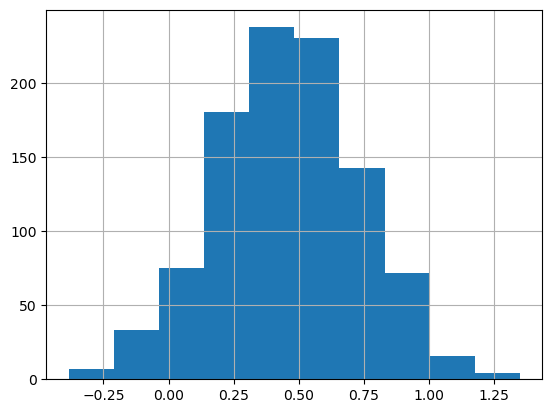

Средняя прибыль в млрд. руб.: 0.459
95% доверительный интервал ( -0.09023406710362324   0.9879538831101812 )
Вероятность получить убыток 4.7


Регион 2


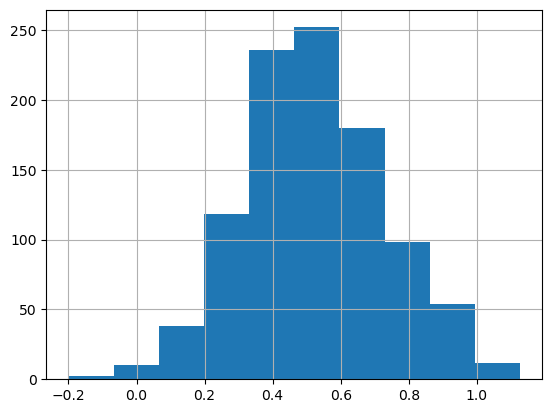

Средняя прибыль в млрд. руб.: 0.524
95% доверительный интервал ( 0.13379119122885114   0.9614501610437706 )
Вероятность получить убыток 0.6


Регион 3


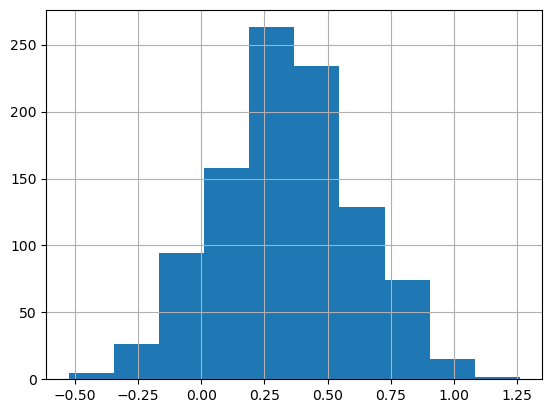

Средняя прибыль в млрд. руб.: 0.341
95% доверительный интервал ( -0.19835593411350116   0.8527085807650117 )
Вероятность получить убыток 11.6




In [14]:
# Для каждого региона в цикле построим свой Bootstrep и посчитаем 2,5% и 97.5% квантили
# от получившегося распределения и среднее

reg_num = 1
for df in [df_0, df_1, df_2]: 
    
    # Сохраним призназнаки и целевой признак в отдельных переменных

    features = df.drop(['product'], axis=1)
    target = df['product']
    
    # Разделим данные на 2 выборки: обучающую и тестовую в пропорции 75:25.

    features_train, features_test, target_train, target_test =\
    train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)
    
# Pipeline для масштабирования признаков и обучения модели

    pipeline = Pipeline(steps=[
        ('scaler',StandardScaler()),
        ('reg', LinearRegression())
    ], verbose=False)

    pipeline.fit(features_train, target_train)
    proba = pipeline.predict(features_test)

    target = pd.Series(target_test).reset_index(drop=True)
    probabilities = pd.Series(proba)
    
# Bootstrap на 1000 повторений

    values = []
    for i in range(1000):
        target_subsample = target.sample(n=DRILL_HOLES_POT, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index]
        values.append(revenue(target_subsample, probs_subsample, DRILL_HOLES_PROD))
    
    print('Регион', reg_num)
    values_1 = pd.Series(values)
    values_1.hist()
    plt.show()

    lower = values_1.quantile(0.025)# считаем 2,5% квантиль
    upper = values_1.quantile(0.975)# считаем 97,5% квантиль
    mean = round(values_1.mean(), 3)
    
    loss_risk = round(st.percentileofscore(values_1, 0), 3)
   
    print("Средняя прибыль в млрд. руб.:", mean)
    print('95% доверительный интервал (',lower,' ',upper,')')
    print('Вероятность получить убыток', loss_risk)
    print('\n')
   
        
    reg_num += 1


*Вывод по разделу:*

По результатам применения техники Bootstrep только для Региона 2 выполняется условие, что вероятность получения компанией убытков составляет менее 2,5 %. 

***Общий вывод по проекту:***

- Попусков в данных не обнаружено;
- Некоторые скважины включены в данные несколько раз; 
- Есть явное различия между регионами в распределении целевого признака;
- Присутствует явная прямая зависимость целевого признака от признака f_2 у региона 2 ;
- У признаков во всех регионов присутстуют выбросы;
- После предобработки часть данных была потеряна. Потери незначительны;
- Построили и протестировали модели линйеной регресси для каждого региона;
- Самое лучший показатель RMSE у модели, построенной для 2-ого региона. У 1-ого и 3-его региона показатели незначительно отличаюся между собой;
- Подготовились к расчёту прибыли;
- Средний запаса на скважину для окупаемости: 111.11 тыс. бар.;
- Средние запасы в регионах недостаточны для окупаемости вложений;
- Если отобрать 200 лучших скважим в каждом регионе, то вложения точно окупяться, показатели ROI положительные, самый лучший результат у 3-го региона.
- Для  каждого региона техникой Bootstrep с 1000-ю выборок по 500 скважин, в каждой из них нашли рапределение прибыли по прогнозам моделей для 200 лучших скважин из 500, среднее значение этого распределния, 95% доверительный интервал, вероятность получить убытки;
- **По результатам применения техники Bootstrep только для Региона 2 выполняется условие, что вероятность получения компанией убытков составляет менее 2,5 %.**
